In [1]:
import torch
from torch import nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

import torchvision as tv
from torch.utils.data import TensorDataset, DataLoader

import warnings
warnings.filterwarnings('ignore')

In [110]:
BATCH_SIZE = 256

In [93]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=tv.transforms.ToTensor(), download=True)
test_dataset  = tv.datasets.FashionMNIST('.', train=False, transform=tv.transforms.ToTensor(), download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [94]:
train_dataset[10][0].shape

torch.Size([1, 28, 28])

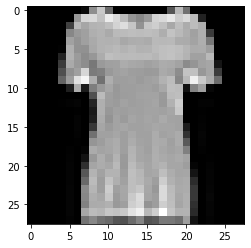

In [95]:
plt.imshow(train_dataset[10][0].numpy().reshape(28, 28), cmap='gray')

In [96]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [111]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"); dev

device(type='cuda')

In [8]:
def evaluate(model, test_iter, dev):    
    model.eval()
    with torch.no_grad():
        acc_sum = 0
        count = 0
        for X, y in test_iter:
            X, y = X.to(dev), y.to(dev)
            acc_sum += (model(X).argmax(axis=1) == y).sum().item()
            count += y.shape[0]
        print(acc_sum)    
        return acc_sum / count
    
def train_net(train_iter, test_iter, model, epochs, trainer):
    dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
    model = model.to(dev)
    
    loss = nn.CrossEntropyLoss(reduction='sum')
    
    for epoch in range(1, epochs + 1):
        train_loss_sum, train_acc_sum, count, start = 0.0, 0.0, 0, time.time()
        
        model.train()
        for X, y in train_iter:
            trainer.zero_grad()
            X, y = X.to(dev), y.to(dev)
            predict = model(X)
            l = loss(predict, y)
            l.backward()
            trainer.step()
            train_loss_sum += l.item()
            train_acc_sum += (predict.argmax(axis=1) == y).sum().item()
            count += y.shape[0]
                        
        train_acc = train_acc_sum / count
        train_loss  = train_loss_sum / count
        test_acc = evaluate(model, test_iter, dev)
        run = time.time() - start
        
        print(f"epoch = {epoch}, train_acc = {train_acc:.7f}, train_loss = {train_loss:.7f}, test_acc = {test_acc:.7f}, time = {run:.7f}")
            

# LeNet

In [15]:
model = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2),
    nn.Sigmoid(),
    nn.AvgPool2d(2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5),
    nn.Sigmoid(),
    nn.AvgPool2d(2, stride=2),
    nn.Flatten(),
    nn.Linear(400, 120),
    nn.Sigmoid(),
    nn.Linear(120, 84),
    nn.Sigmoid(),
    nn.Linear(84, 10)
)
lr, epochs = 0.9, 5
trainer = torch.optim.SGD(model.parameters(), lr=lr)
train_net(train_iter, test_iter, model, epochs, trainer)

epoch = 1, train_acc = 0.1000333, train_loss = 206.1262176, test_acc = 0.1000000, time = 4.9542348
epoch = 2, train_acc = 0.1008167, train_loss = 204.0947178, test_acc = 0.1000000, time = 5.0343487
epoch = 3, train_acc = 0.1004833, train_loss = 202.8826662, test_acc = 0.1000000, time = 5.0049510
epoch = 4, train_acc = 0.1025500, train_loss = 202.0799955, test_acc = 0.1000000, time = 5.1174035
epoch = 5, train_acc = 0.1021000, train_loss = 202.3200161, test_acc = 0.1000000, time = 4.8503940


# AlexNet

In [2]:
transforms = tv.transforms.Compose([
    tv.transforms.Resize((224,224)),
    tv.transforms.ToTensor()
])
BATCH_SIZE=34

In [3]:
train_dataset = tv.datasets.FashionMNIST('.', train=True, transform=transforms, download=True)
test_dataset  = tv.datasets.FashionMNIST('.', train=False, transform=transforms, download=True)
train_iter = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_iter = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

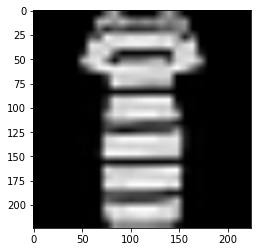

In [4]:
plt.imshow(train_dataset[1011][0].numpy().reshape(224, 224), cmap='gray')

In [116]:
train_dataset[1011][0].shape

torch.Size([1, 224, 224])

In [5]:
model = nn.Sequential(
    nn.Conv2d(1, 96, kernel_size=11, stride=4),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Conv2d(96, 256, kernel_size=5, padding=2),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Conv2d(256, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(3, stride=2),
    nn.Flatten(),
    nn.Linear(6400, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 4096),
    nn.ReLU(),
    nn.Dropout(0.5),
    nn.Linear(4096, 10)
)

In [118]:
lr, epochs  = 0.9, 2
trainer = torch.optim.AdamW(model.parameters(), lr=lr)
train_net(train_iter, test_iter, model, epochs, trainer)

1000
epoch = 1, train_acc = 0.1018167, train_loss = 1392765976994978048.0000000, test_acc = 0.1000000, time = 100.0220613
1000
epoch = 2, train_acc = 0.1018167, train_loss = 2.3830664, test_acc = 0.1000000, time = 100.5894938


In [86]:
epochs = 1

In [87]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = model.to(dev)
    
loss = nn.CrossEntropyLoss(reduction='sum')
    
for epoch in range(1, epochs + 1):
    train_loss_sum, train_acc_sum, count, start = 0.0, 0.0, 0, time.time()

    model.train()
    for X, y in train_iter:
        trainer.zero_grad()
        X, y = X.to(dev), y.to(dev)
        predict = model(X)
        l = loss(predict, y)
        l.backward()
        trainer.step()
        train_loss_sum += l.item()
        train_acc_sum += (predict.argmax(axis=1) == y).sum().item()
#         print('Правильно - ', (predict.argmax(axis=1) == y).sum().item())
        count += y.shape[0]
        


    train_acc = train_acc_sum / count
    train_loss  = train_loss_sum / count
    test_acc = evaluate(model, test_iter, dev)
    run = time.time() - start
    
    print(train_acc_sum, train_acc)
 

Правильно -  2
Правильно -  4
Правильно -  3
Правильно -  0
Правильно -  3
Правильно -  8
Правильно -  1
Правильно -  3
Правильно -  3
Правильно -  4
Правильно -  3
Правильно -  2
Правильно -  4
Правильно -  3
Правильно -  2
Правильно -  6
Правильно -  2
Правильно -  1
Правильно -  3
Правильно -  2
Правильно -  3
Правильно -  4
Правильно -  3
Правильно -  3
Правильно -  6
Правильно -  3
Правильно -  5
Правильно -  3
Правильно -  4
Правильно -  6
Правильно -  3
Правильно -  5
Правильно -  6
Правильно -  3
Правильно -  2
Правильно -  5
Правильно -  3
Правильно -  3
Правильно -  3
Правильно -  4
Правильно -  3
Правильно -  6
Правильно -  3
Правильно -  3
Правильно -  3
Правильно -  4
Правильно -  4
Правильно -  4
Правильно -  3
Правильно -  3
Правильно -  4
Правильно -  3
Правильно -  3
Правильно -  4
Правильно -  4
Правильно -  5
Правильно -  1
Правильно -  4
Правильно -  2
Правильно -  2
Правильно -  8
Правильно -  4
Правильно -  4
Правильно -  3
Правильно -  4
Правильно -  3
Правильно 

Правильно -  3
Правильно -  3
Правильно -  3
Правильно -  3
Правильно -  2
Правильно -  3
Правильно -  1
Правильно -  1
Правильно -  5
Правильно -  4
Правильно -  2
Правильно -  5
Правильно -  1
Правильно -  1
Правильно -  6
Правильно -  1
Правильно -  4
Правильно -  3
Правильно -  0
Правильно -  5
Правильно -  2
Правильно -  3
Правильно -  1
Правильно -  5
Правильно -  2
Правильно -  2
Правильно -  4
Правильно -  1
Правильно -  3
Правильно -  2
Правильно -  5
Правильно -  2
Правильно -  7
Правильно -  7
Правильно -  5
Правильно -  3
Правильно -  3
Правильно -  3
Правильно -  1
Правильно -  3
Правильно -  1
Правильно -  7
Правильно -  4
Правильно -  2
Правильно -  3
Правильно -  3
Правильно -  3
Правильно -  3
Правильно -  2
Правильно -  3
Правильно -  1
Правильно -  4
Правильно -  2
Правильно -  5
Правильно -  3
Правильно -  2
Правильно -  5
Правильно -  1
Правильно -  2
Правильно -  4
Правильно -  3
Правильно -  2
Правильно -  6
Правильно -  4
Правильно -  5
Правильно -  1
Правильно 

Правильно -  4
Правильно -  3
Правильно -  3
Правильно -  4
Правильно -  1
Правильно -  2
Правильно -  2
Правильно -  1
Правильно -  6
Правильно -  3
Правильно -  4
Правильно -  3
Правильно -  2
Правильно -  6
Правильно -  3
Правильно -  2
Правильно -  5
Правильно -  4
Правильно -  4
Правильно -  4
Правильно -  3
Правильно -  7
Правильно -  3
Правильно -  5
Правильно -  2
Правильно -  4
Правильно -  6
Правильно -  7
Правильно -  3
Правильно -  2
Правильно -  3
Правильно -  4
Правильно -  4
Правильно -  3
Правильно -  2
Правильно -  4
Правильно -  1
Правильно -  2
Правильно -  4
Правильно -  3
Правильно -  3
Правильно -  5
Правильно -  3
Правильно -  8
Правильно -  1
Правильно -  5
Правильно -  2
Правильно -  3
Правильно -  0
Правильно -  3
Правильно -  5
Правильно -  2
Правильно -  6
Правильно -  3
Правильно -  5
Правильно -  4
Правильно -  4
Правильно -  3
Правильно -  2
Правильно -  4
Правильно -  5
Правильно -  4
Правильно -  6
Правильно -  2
Правильно -  2
Правильно -  1
Правильно 

Правильно -  3
Правильно -  3
Правильно -  2
Правильно -  6
Правильно -  1
Правильно -  3
Правильно -  1
Правильно -  3
Правильно -  1
Правильно -  2
Правильно -  4
Правильно -  1
Правильно -  4
Правильно -  2
Правильно -  2
Правильно -  2
Правильно -  3
Правильно -  3
Правильно -  2
Правильно -  5
Правильно -  5
Правильно -  7
Правильно -  6
Правильно -  5
Правильно -  4
Правильно -  5
Правильно -  5
Правильно -  3
Правильно -  3
Правильно -  5
Правильно -  4
Правильно -  3
Правильно -  4
Правильно -  4
Правильно -  5
Правильно -  3
Правильно -  3
Правильно -  4
Правильно -  4
Правильно -  2
Правильно -  4
Правильно -  1
Правильно -  2
Правильно -  6
Правильно -  6
Правильно -  5
Правильно -  4
Правильно -  5
Правильно -  4
Правильно -  3
Правильно -  3
Правильно -  1
Правильно -  2
Правильно -  4
Правильно -  1
Правильно -  5
Правильно -  1
Правильно -  4
Правильно -  1
Правильно -  5
Правильно -  3
Правильно -  2
Правильно -  1
Правильно -  2
Правильно -  6
Правильно -  0
Правильно 

# VGG

In [6]:
def vgg_block(num_convs, input_channels, num_channels):
    blk = nn.Sequential(nn.Conv2d(input_channels, num_channels, kernel_size=3, padding=1), nn.ReLU())
    for i in range(num_convs - 1):
        blk.add_module("conv{}".format(i), nn.Conv2d(num_channels, num_channels, kernel_size=3, padding=1))
        blk.add_module("relu{}".format(i), nn.ReLU())
    blk.add_module("pool", nn.MaxPool2d(2, stride=2))
    return blk

conv_arch = ((1, 1, 64), (1, 64, 128), (2, 128, 256), (2, 256, 512), (2, 512, 512))

def vgg(conv_arch):
    net = nn.Sequential()

    for i, (num_convs, input_ch, num_channels) in enumerate(conv_arch):
        net.add_module("block{}".format(i), vgg_block(num_convs, input_ch, num_channels))

    
    classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(6272, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
        nn.Linear(4096, 10))

    net.add_module('classifier', classifier)
    return net

net = vgg(conv_arch)

In [9]:
lr, epochs  = 0.1, 2
trainer = torch.optim.AdamW(model.parameters(), lr=lr)
train_net(train_iter, test_iter, net, epochs, trainer)

RuntimeError: size mismatch, m1: [34 x 25088], m2: [6272 x 4096] at /pytorch/aten/src/THC/generic/THCTensorMathBlas.cu:290

In [10]:
ratio = 4
small_conv_arch = [(v[0], max(v[1] // ratio, 1), v[2] // ratio) for v in conv_arch]
net = vgg(small_conv_arch)

In [11]:
x = train_dataset[0][0].reshape(1,1,224,224)
for l in net:
    x = l(x)
    print(l, "\t\t", x.shape)

Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
) 		 torch.Size([1, 16, 112, 112])
Sequential(
  (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
) 		 torch.Size([1, 32, 56, 56])
Sequential(
  (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (conv0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu0): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
) 		 torch.Size([1, 64, 28, 28])
Sequential(
  (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (conv0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu0): ReLU()
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, 

In [12]:
lr, epochs  = 0.05, 5
trainer = torch.optim.AdamW(model.parameters(), lr=lr)
train_net(train_iter, test_iter, net, epochs, trainer)

1000
epoch = 1, train_acc = 0.0969333, train_loss = 2.3026698, test_acc = 0.1000000, time = 133.1354883
1000
epoch = 2, train_acc = 0.0996500, train_loss = 2.3026321, test_acc = 0.1000000, time = 133.5978584
1000
epoch = 3, train_acc = 0.0988667, train_loss = 2.3026391, test_acc = 0.1000000, time = 132.3717394


KeyboardInterrupt: 